In [20]:
import pandas as pd
from paths import create_results_path, get_config_hash


# This run's optionsa
n_runs = 3
datasets = ['civilcomments']
list_of_group_vars = [['sex:male',  'race:black', 'religion:muslim'],]
# list_of_group_vars = [['sex:male',  'race:black'],]

# datasets = ['camelyon17']
# list_of_group_vars = [['WSI_index']]

ranking_algs = ['random', 'labeled_global', 'labeled_group_specific', 'oracle']
labeled_pcts = [.025, .05, .1, .25, .5, 1.0]


# Sorting so that the different orderings of group variables produce the same experiment config

list_of_group_vars = [sorted(x) for x in list_of_group_vars]
group_definitions = [','.join(x) for x in list_of_group_vars]

expt_configs = []
for dataset in datasets:
    for ranking_alg in ranking_algs:
        for group_definition in group_definitions:
            for labeled_pct in labeled_pcts:
                for run in range(n_runs):

                    expt_config = {'dataset': dataset, 'learning_algs': ['ERM', 'IRM', 'GroupDRO', 'CORAL'],
                                'group_definition': group_definition,
                                'ranking_alg':  ranking_alg, 'labeled_pct': labeled_pct, 'run': run}
                                
                    expt_configs.append(expt_config)

# Load all results
results = []
for expt_config in expt_configs:
    results_dir = create_results_path(expt_config)
    results.append(pd.read_csv(results_dir + '/' + get_config_hash(expt_config) + '.csv'))
results_df = pd.concat(results)

/data/ddmg/frank/.conda/envs/frank/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/ddmg/frank/.conda/envs/frank/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/ddmg/frank/.conda/envs/frank/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/ddmg/frank/.conda/envs/frank/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 1.0, 'Dataset: civilcomments')

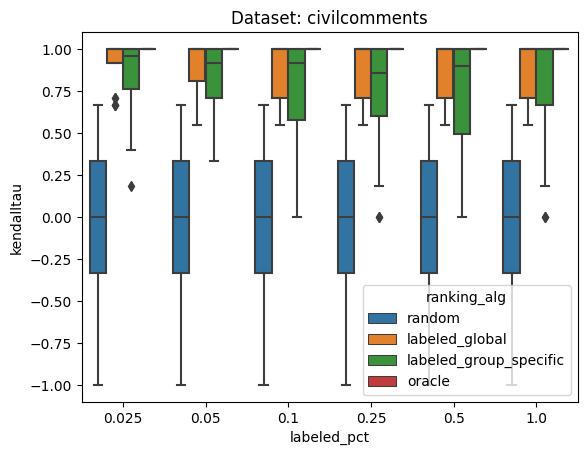

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# x-axis is amount of labeled data 
# y-axis is avg # of swaps from true ranking across groups? 
# color is ranking algorithm (labeled_global, labeled_group_specific, oracle, random)

sns.boxplot(x='labeled_pct', y='kendalltau', hue='ranking_alg', data=results_df)
plt.title("Dataset: " +  dataset)

In [ ]:
# Plot as a function of group size


In [ ]:
# Heterogeneity in group size

In [11]:
small_data = results_df[results_df['labeled_pct'] == .1]
small_data.groupby(['group', 'ranking_alg']).first()

Unnamed: 0       ranking  true_ranking  \
group ranking_alg                                                      
0,0,0 labeled_global                   0  (3, 0, 2, 1)  (3, 0, 2, 1)   
      labeled_group_specific           0  (3, 0, 2, 1)  (3, 0, 2, 1)   
      oracle                           0  (3, 0, 2, 1)  (3, 0, 2, 1)   
      random                           0  (2, 3, 1, 0)  (3, 0, 2, 1)   
0,0,1 labeled_global                   1  (3, 0, 2, 1)  (3, 0, 2, 1)   
      labeled_group_specific           1  (3, 0, 1, 2)  (3, 0, 2, 1)   
      oracle                           1  (3, 0, 2, 1)  (3, 0, 2, 1)   
      random                           1  (1, 0, 2, 3)  (3, 0, 2, 1)   
0,1,0 labeled_global                   2  (3, 0, 2, 1)  (3, 0, 2, 1)   
      labeled_group_specific           2  (3, 0, 1, 2)  (3, 0, 2, 1)   
      oracle                           2  (3, 0, 2, 1)  (3, 0, 2, 1)   
      random                           2  (3, 1, 0, 2)  (3, 0, 2, 1)   
0,1,1 labeled_global                   3  (3, 0, 2, 1)  (3, 0, 2, 1)   
      labeled_group_specific           3  (3, 2, 0, 1)  (3, 0, 2, 1)   
      oracle                           3  (3, 0, 2, 1)  (3, 0, 2, 1)   
      random                           3  (3, 0, 1, 2)  (3, 0, 2, 1)   
1,0,0 labeled_global                   4  (3, 0, 2, 1)  (3, 0, 2, 1)   
      labeled_group_specific           4  (3, 1, 2, 0)  (3, 0, 2, 1)   
      oracle                           4  (3, 0, 2, 1)  (3, 0, 2, 1)   
      random                           4  (1, 2, 0, 3)  (3, 0, 2, 1)   
1,0,1 labeled_global                   5  (3, 0, 2, 1)  (3, 0, 2, 1)   
      labeled_group_specific           5  (3, 0, 1, 2)  (3, 0, 2, 1)   
      oracle                           5  (3, 0, 2, 1)  (3, 0, 2, 1)   
      random                           5  (3, 2, 0, 1)  (3, 0, 2, 1)   
1,1,0 labeled_global                   6  (3, 0, 2, 1)  (3, 0, 1, 2)   
      labeled_group_specific           6  (0, 1, 2, 3)  (3, 0, 1, 2)   
      oracle                           6  (3, 0, 1, 2)  (3, 0, 1, 2)   
      random                           6  (1, 0, 3, 2)  (3, 0, 1, 2)   
1,1,1 labeled_global                   7  (3, 0, 2, 1)  (3, 2, 0, 1)   
      labeled_group_specific           7  (3, 1, 2, 0)  (3, 2, 0, 1)   
      oracle                           7  (3, 2, 0, 1)  (3, 2, 0, 1)   
      random                           7  (0, 1, 2, 3)  (3, 2, 0, 1)   

                              kendalltau        dataset  \
group ranking_alg                                         
0,0,0 labeled_global            1.000000  civilcomments   
      labeled_group_specific    1.000000  civilcomments   
      oracle                    1.000000  civilcomments   
      random                    0.000000  civilcomments   
0,0,1 labeled_global            1.000000  civilcomments   
      labeled_group_specific    0.666667  civilcomments   
      oracle                    1.000000  civilcomments   
      random                    0.000000  civilcomments   
0,1,0 labeled_global            1.000000  civilcomments   
      labeled_group_specific    0.666667  civilcomments   
      oracle                    1.000000  civilcomments   
      random                    0.333333  civilcomments   
0,1,1 labeled_global            1.000000  civilcomments   
      labeled_group_specific    0.000000  civilcomments   
      oracle                    1.000000  civilcomments   
      random                    0.666667  civilcomments   
1,0,0 labeled_global            1.000000  civilcomments   
      labeled_group_specific    0.666667  civilcomments   
      oracle                    1.000000  civilcomments   
      random                   -0.333333  civilcomments   
1,0,1 labeled_global            1.000000  civilcomments   
      labeled_group_specific    0.666667  civilcomments   
      oracle                    1.000000  civilcomments   
      random                    0.000000  civilcomments   
1,1,0 labeled_global            0.666667  civil